In [1]:
### We'll use: Logistic regression, SVM and KNN

In [6]:
import pandas as pd
import numpy as np
## Bivariate statistic
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn

In [7]:
df=pd.read_csv('data/dataset.csv')

In [ ]:
## Let's display the 5 first rows

In [8]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [9]:
df.max()

Loan_ID                  LP002990
Education            Not Graduate
ApplicantIncome             81000
CoapplicantIncome           41667
LoanAmount                    700
Loan_Amount_Term              480
Credit_History                  1
Property_Area               Urban
Loan_Status                     Y
dtype: object

In [10]:
## The shape of df

In [11]:
print("we have {} observations and {} variables".format(df.shape[0],df.shape[1]))

we have 614 observations and 13 variables


In [12]:
## Data description

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [14]:
## Types of variables

In [15]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
## Let's check missing values

In [17]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [20]:
# df[['Credit_History']]=df[['Credit_History']]

In [21]:
## Let drop the Loan_ID

In [22]:
df.drop('Loan_ID',axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
## Replace the missing values for categorical variables by the their mode and numerical variable by 0

In [24]:
Cat_variables=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
Numerical_variables=['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History']

In [25]:
mode=[]
mode_value=dict()
for i in Cat_variables:
    m=dict(df[i].value_counts())
    #mode.append(m)
#     print(i)
#     print(df[i].value_counts())
#     print('----')
    
    #print(m)

    key=list(m.keys())
    print(key[0])
    mode.append(key[0])

Male
Yes
0
Graduate
No
Semiurban


In [26]:
print('The mode of each categorical variables are: ',mode)

The mode of each categorical variables are:  ['Male', 'Yes', '0', 'Graduate', 'No', 'Semiurban']


In [27]:
## Let handle missing values

In [28]:
## For Categorical variables

In [29]:
for i in range(len(Cat_variables)):
    l=Cat_variables[i]
    df[[l]]=df[[l]].fillna(mode[i])

In [30]:
## For numerical variable

In [31]:
df.fillna(0,axis=0,inplace=True)

In [32]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
## Let's check if our dataset is balanced

In [34]:
N_of_positive,N_of_negative=list(df.Loan_Status.value_counts())
print("We have: ", (N_of_positive/df.shape[0])*100, "%", "Of positive")
print("We have: ", (N_of_negative/df.shape[0])*100, "%", "Of negative")

We have:  68.72964169381108 % Of positive
We have:  31.27035830618892 % Of negative


In [35]:
## Let's plot the classes distribution

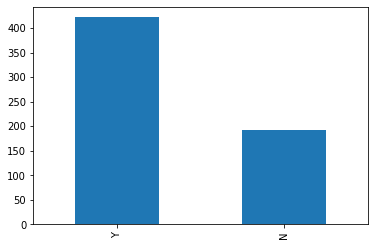

In [36]:
df.Loan_Status.value_counts().plot(kind='bar')

In [37]:
## Let's encode the target variable (loan_status)

In [38]:
encode={"Y":1,"N":0}
df.Loan_Status=df.Loan_Status.map(encode)

In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [40]:
## Univariate statistic

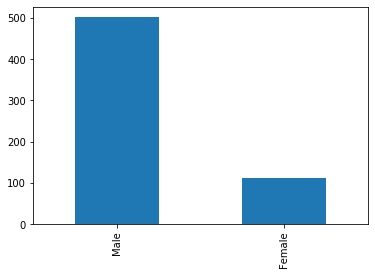

In [41]:
df.Gender.value_counts().plot(kind='bar')

Gender


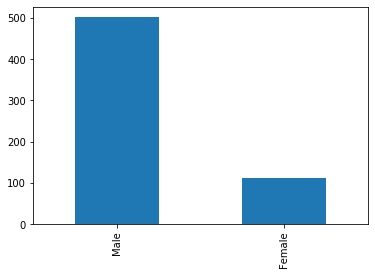

Married


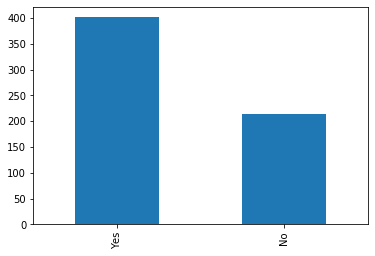

Dependents


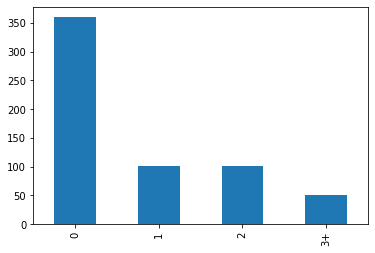

Education


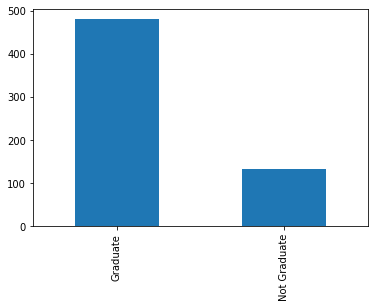

Self_Employed


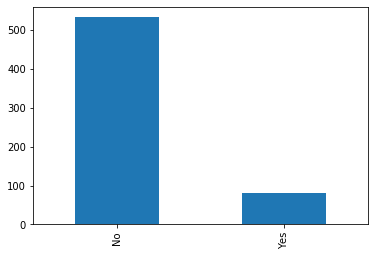

Property_Area


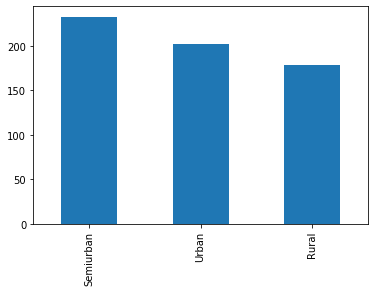

In [42]:
for i in range(len(Cat_variables)):
    l=Cat_variables[i]
    print(l)
    df[l].value_counts().plot(kind='bar')
    plt.show()

In [43]:
Numerical_variables

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <a list of 10 Patch objects>)

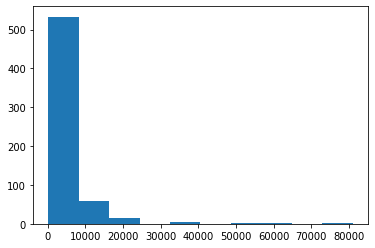

In [44]:
plt.hist(df.ApplicantIncome)

ApplicantIncome


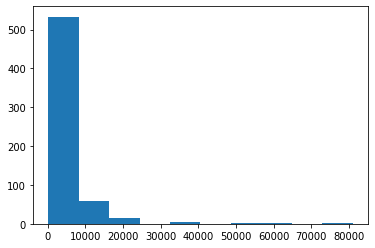

CoapplicantIncome


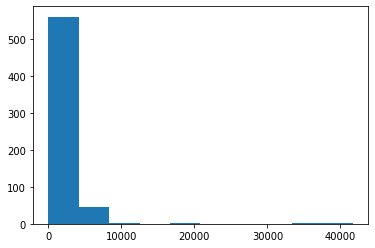

LoanAmount


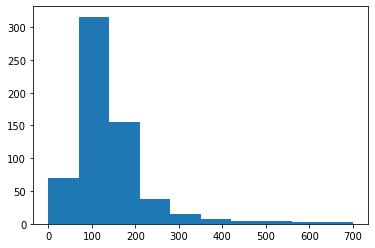

Credit_History


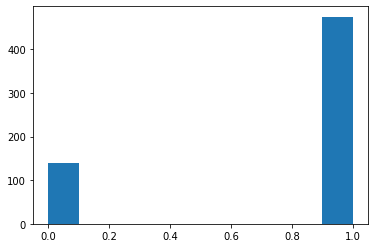

In [45]:
for i in Numerical_variables:
    l=i
    print(l)
    plt.hist(df[l])
    plt.show()

ApplicantIncome


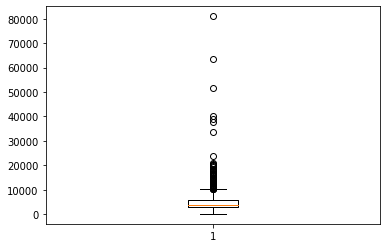

CoapplicantIncome


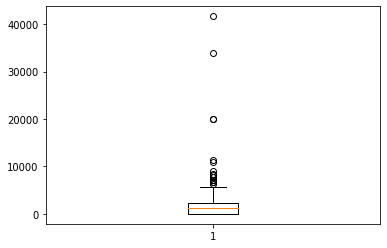

LoanAmount


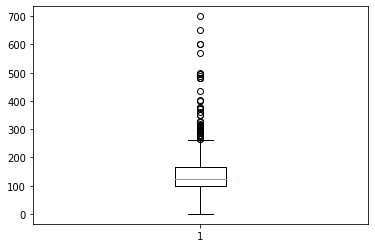

Credit_History


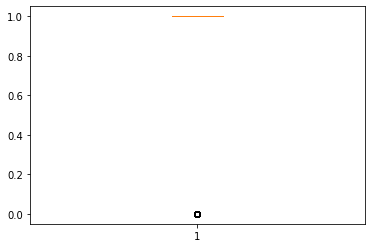

In [46]:
for i in Numerical_variables:
    l=i
    print(l)
    plt.boxplot(df[l])
    plt.show()

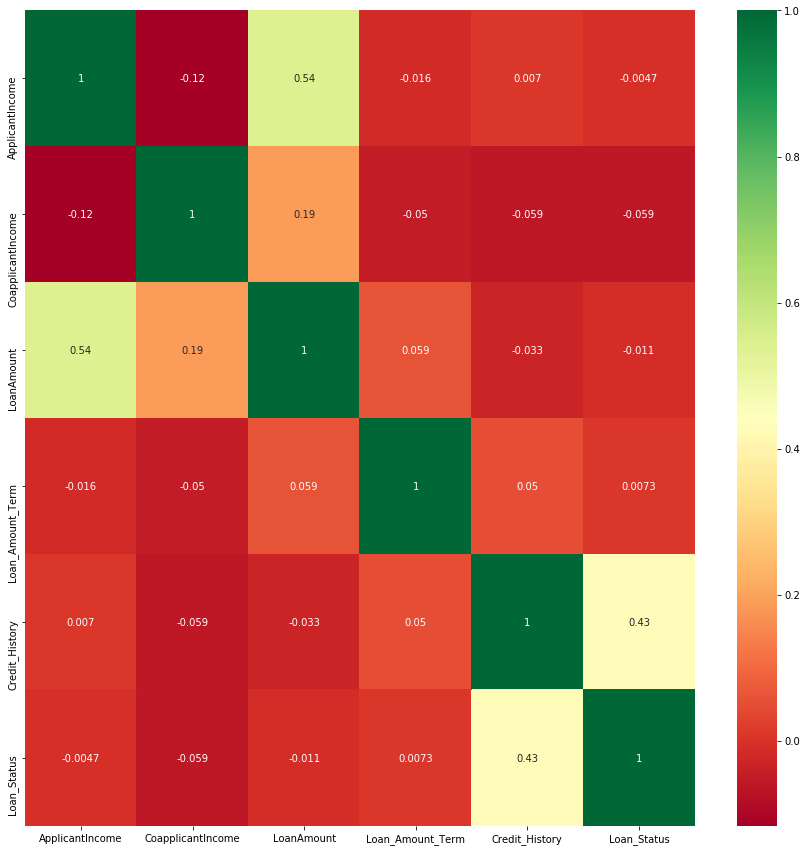

In [47]:
## Compute the correlation matrix
CorMat=df.corr()
features_in_top=CorMat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(df[features_in_top].corr(),annot=True,cmap='RdYlGn')

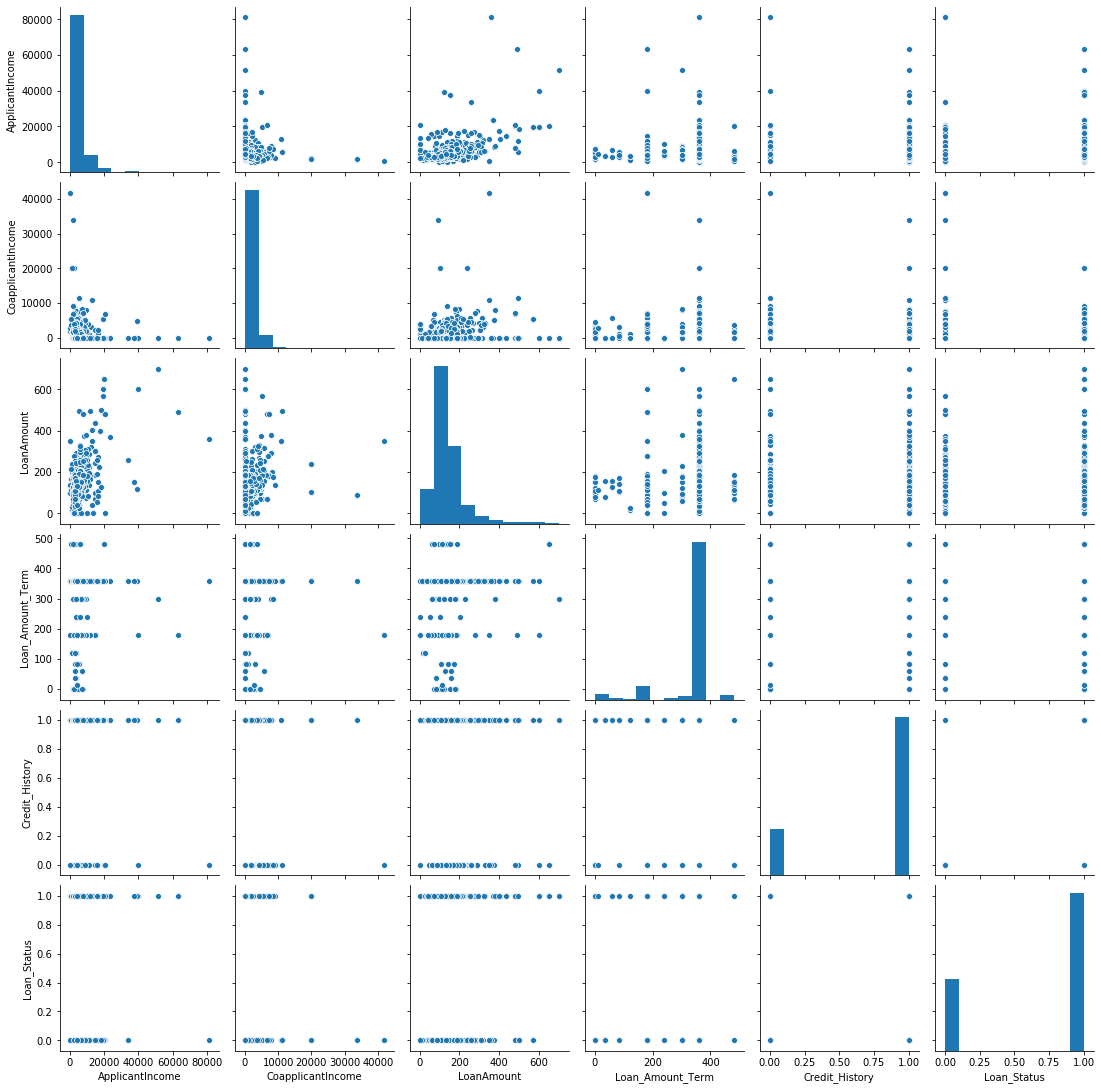

In [48]:
sns.pairplot(data=df)

In [49]:
### Separation of X and y
y=df[['Loan_Status']]

X=df.drop('Loan_Status',axis=1)

In [50]:
## Handle categorical variables

# We've nominal (without order) and ordinal (with order).

# Ordinal:
Ordinal=['Education','Property_Area','Dependents']

# Nominal:
Nominal=['Gender','Married','Self_Employed']

In [51]:
for i in Ordinal:
    l=i
    print(l,':')
    print(df[l].value_counts())
    print('--------')

Education :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
--------
Property_Area :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
--------
Dependents :
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
--------


In [52]:
for i in Nominal:
    l=i
    print(l,':')
    print(df[l].value_counts())
    print('--------')

Gender :
Male      502
Female    112
Name: Gender, dtype: int64
--------
Married :
Yes    401
No     213
Name: Married, dtype: int64
--------
Self_Employed :
No     532
Yes     82
Name: Self_Employed, dtype: int64
--------


In [53]:
## Let encode ordinal variables:
Education={'Graduate':2,'Not Graduate':1}
Property_Area={'Semiurban':2,'Urban':3,"Rural":0}
Dependents={'0':0,'1':1,'2':2,'3+':3}

Gender={'Male':1,'Female':0}
Married={'Yes':1,'No':0}
Self_Employed={'No':1,'Yes':0}

In [54]:
X.Education=X.Education.map(Education)
X.Property_Area=X.Property_Area.map(Property_Area)
X.Married=X.Married.map(Married)
X.Dependents=X.Dependents.map(Dependents)
X.Gender=X.Gender.map(Gender)
X.Self_Employed=X.Self_Employed.map(Self_Employed)

In [55]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,2,1,5849,0.0,0.0,360.0,1.0,3
1,1,1,1,2,1,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,2,0,3000,0.0,66.0,360.0,1.0,3
3,1,1,0,1,1,2583,2358.0,120.0,360.0,1.0,3
4,1,0,0,2,1,6000,0.0,141.0,360.0,1.0,3


In [56]:
## Let's separate X to X_train and X_valid
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
Numerical_variables

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']

In [59]:
## Features Engineering
X_train_num=X_train[Numerical_variables]
X_train_new=X_train.drop(Numerical_variables,axis=1)
X_valid_num=X_valid[Numerical_variables]
X_valid_new=X_valid.drop(Numerical_variables,axis=1)

In [60]:
X_train_new.shape,X_train_num.shape

((491, 7), (491, 4))

In [61]:
## 1) Handling of numerical variable: Standardization
from sklearn.preprocessing import StandardScaler

In [62]:
scaler=StandardScaler()
scaler=scaler.fit(X_train_num)

In [63]:
scaler.mean_

array([5.31788187e+03, 1.57956196e+03, 1.38775967e+02, 7.63747454e-01])

In [64]:
X_train_scale=scaler.transform(X_train_num)
X_valid_scale=scaler.transform(X_valid_num)

In [65]:
X_train_scale=pd.DataFrame(X_train_scale,columns=Numerical_variables)
X_valid_scale=pd.DataFrame(X_valid_scale,columns=Numerical_variables)


In [66]:
X_train_new=X_train_new.reset_index()
X_valid_new=X_valid_new.reset_index()

In [67]:
X_train_new.head()

,index,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Property_Area
0,222,1,0,0,2,1,360.0,2
1,281,1,1,0,2,1,360.0,2
2,372,1,1,2,2,0,300.0,0
3,32,1,0,1,2,0,360.0,0
4,204,1,1,2,1,1,360.0,2


In [68]:
## Let's Merge our dataset (cat and num)
X_train=pd.concat([X_train_scale,X_train_new],axis=1)
X_valid=pd.concat([X_valid_scale,X_valid_new],axis=1)

In [69]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,index,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Property_Area
0,-0.390266,0.449850,0.063991,0.556177,222,1,0,0,2,1,360.0,2
1,-0.231291,-0.289479,-0.327989,0.556177,281,1,1,0,2,1,360.0,2
2,0.666016,2.336979,2.954849,0.556177,372,1,1,2,2,0,300.0,0
3,-0.104079,-0.586548,-0.401486,0.556177,32,1,0,1,2,0,360.0,0
4,-0.232954,-0.586548,-0.180997,0.556177,204,1,1,2,1,1,360.0,2


In [70]:
X_train.drop(['index'],axis=1,inplace=True)

In [71]:
X_valid.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,index,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Property_Area
0,-0.526957,0.615466,0.480471,-1.797987,414,0,1,0,1,1,360.0,2
1,-0.357839,0.179889,-0.425985,-1.797987,569,1,1,0,2,1,360.0,3
2,-0.203355,0.693447,0.149737,0.556177,265,1,0,0,2,1,360.0,0
3,-0.221148,-0.586548,-1.087452,0.556177,84,1,1,1,2,1,240.0,3
4,-0.539928,-0.306561,-0.548479,0.556177,109,1,1,3,1,1,480.0,2


In [72]:
X_valid.drop(['index'],axis=1,inplace=True)

In [73]:
## 2) Let's contruct de model

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,f1_score,precision_score,recall_score,roc_auc_score

In [75]:
logit=LogisticRegression()
logit.fit(X_train,y_train)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [76]:
y_pred=logit.predict(X_valid)

In [77]:
logit.coef_

array([[-1.14136388e-01,  4.21719716e-02, -2.61955950e-02,
         9.26822456e-01,  2.81225756e-02,  7.48862355e-01,
        -1.30242048e-01,  2.45078311e-01, -2.01818662e-01,
        -2.68629205e-06,  1.50424640e-01]])

In [78]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [79]:
print("accuracy :" , logit.score(X_valid,y_valid))

accuracy : 0.7723577235772358


In [80]:
y_valid.values.shape, y_pred.reshape(-1,1).shape

((123, 1), (123, 1))

In [81]:
roc=roc_auc_score(y_valid,y_pred)
acc=accuracy_score(y_valid,y_pred)
prec=precision_score(y_valid,y_pred)
rec=recall_score(y_valid,y_pred)

f1=2 * (prec * rec) / (prec + rec)

In [82]:
Result=pd.DataFrame(['Logistic Regression']+[acc,prec,rec,f1,roc]).T
Result.columns=['Model','Accuracy','Precision','Recall','F1 Score','ROC']
Result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.772358,0.78,0.928571,0.847826,0.682234


In [83]:
# Resultat=pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1 Score','ROC'])

# def get_summary(model,y_pred):
#     roc=roc_auc_score(y_valid,y_pred)
#     #f1_score=f1_score(y_valid,y_pred)
#     acc=accuracy_score(y_valid,y_pred)
#     prec=precision_score(y_valid,y_pred)
#     rec=recall_score(y_valid,y_pred)
#     results=pd.DataFrame([model,acc,prec,rec,f1_score,roc],columns=['Model','Accuracy','Precision','Recall','F1 Score','ROC'])
    
#     return results   

In [84]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [85]:
## Prediction of new example
mysample = np.array(['Male','No','0','Graduate','No',5849,0,0,360,1,'Urban'])
ex=mysample.reshape(-1,1)

In [86]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [87]:
## Transformations que va subir la données

In [88]:
ex

array([['Male'],
       ['No'],
       ['0'],
       ['Graduate'],
       ['No'],
       ['5849'],
       ['0'],
       ['0'],
       ['360'],
       ['1'],
       ['Urban']], dtype='<U8')

In [89]:
# 1) Categorical variables
ex=pd.DataFrame(ex).T
ex.columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

In [90]:
ex

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0,0,360,1,Urban


In [91]:
Cat_variables

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [92]:
mode

['Male', 'Yes', '0', 'Graduate', 'No', 'Semiurban']

In [93]:
## Missing values: cat
for i in range(len(Cat_variables)):
    l=Cat_variables[i]
    ex[[l]]=ex[[l]].fillna(mode[i])

In [94]:
ex

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0,0,360,1,Urban


In [95]:
## Missing values: num
df.fillna(0,axis=0,inplace=True)

In [96]:
Education

{'Graduate': 2, 'Not Graduate': 1}

In [97]:
ex.Education=ex.Education.map(Education)
ex.Property_Area=ex.Property_Area.map(Property_Area)
ex.Married=ex.Married.map(Married)
ex.Dependents=ex.Dependents.map(Dependents)
ex.Gender=ex.Gender.map(Gender)
ex.Self_Employed=ex.Self_Employed.map(Self_Employed)

In [98]:
ex

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,2,1,5849,0,0,360,1,3


In [99]:
## Normalisation

In [100]:
ex_num=ex[Numerical_variables]
ex=ex.drop(Numerical_variables,axis=1)

In [101]:
ex_cale=scaler.transform(ex_num)

In [102]:
ex

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Property_Area
0,1,0,0,2,1,360,3


In [103]:
ex_cale=pd.DataFrame(ex_cale,columns=Numerical_variables)

In [104]:
new_data=pd.concat([ex_cale,ex],axis=1)

In [105]:
new_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Property_Area
0,0.08832,-0.586548,-1.699922,0.556177,1,0,0,2,1,360,3


In [106]:
logit.predict(new_data)

array([1], dtype=int64)

In [107]:
## Let's save the model

In [108]:
import joblib

In [114]:
## ENregistre le model: 'logit'
joblib.dump(logit, 'logit_model_credit.pkl')

['logit_model_credit.pkl']

In [115]:
## Chargeons notre modele pour ultilisation
logit_model = joblib.load('logit_model_credit.pkl')

In [ ]:
logit_model.predict(new_data)

## Svm

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC(C=1000, kernel='rbf')

In [ ]:
svm.fit(X_train,y_train)

In [ ]:
y_valid.shape

In [ ]:
print("accuracy :" , svm.score(X_valid,y_valid))

In [ ]:
y_pred=svm.predict(X_valid)

In [111]:

roc=roc_auc_score(y_valid,y_pred)
acc=accuracy_score(y_valid,y_pred)
prec=precision_score(y_valid,y_pred)
rec=recall_score(y_valid,y_pred)

f1=2 * (prec * rec) / (prec + rec)

In [112]:
Result=pd.DataFrame(['svm']+[acc,prec,rec,f1,roc]).T
Result.columns=['Model','Accuracy','Precision','Recall','F1 Score','ROC']
Result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,svm,0.772358,0.78,0.928571,0.847826,0.682234


In [113]:
## Save the model
joblib.dump(svm, 'svm_model_credit.pkl')

NameError: name 'svm' is not defined

In [ ]:
## Charger le model svm
svm_model=joblib.load('svm_model_credit.pkl')

In [228]:
svm_model.predict(new_data)

array([1], dtype=int64)

## Knn

In [229]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [230]:
knn.fit(X_train,y_train)
print("accuracy :" , knn.score(X_valid,y_valid))

accuracy : 0.7235772357723578


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [231]:
y_pred=knn.predict(X_valid)

In [232]:
roc=roc_auc_score(y_valid,y_pred)
acc=accuracy_score(y_valid,y_pred)
prec=precision_score(y_valid,y_pred)
rec=recall_score(y_valid,y_pred)

f1=2 * (prec * rec) / (prec + rec)

In [233]:
Result=pd.DataFrame(['knn']+[acc,prec,rec,f1,roc]).T
Result.columns=['Model','Accuracy','Precision','Recall','F1 Score','ROC']
Result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,knn,0.723577,0.755102,0.880952,0.813187,0.632784


In [234]:
joblib.dump(logit, 'knn_model_credit.pkl')

['knn_model_credit.pkl']

In [235]:
## 
knn_model=joblib.load('knn_model_credit.pkl')

In [236]:
knn_model.predict(new_data)

array([1], dtype=int64)